In [1]:
from sklearn.metrics import roc_auc_score, precision_recall_curve
from sklearn.metrics import auc as calculate_auc
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from tqdm import tqdm
from sklearn.utils import shuffle 
from joblib import load, dump
import numpy as np
import pandas as pd
import os,sys,json
from argparse import ArgumentParser
from scipy.stats.stats import pearsonr
import time
import xgboost

In [2]:
def rmse(y_true, y_pred):
	mse = mean_squared_error(y_true, y_pred)
	rmse = np.sqrt(mse)  
	return rmse

In [3]:
df=pd.read_csv('CB2_Chembl_R6227.csv')

In [5]:
y = df['PActivity'].astype('float').values
X=pd.read_csv('Mo_Pu_ma_r.csv')

In [7]:
import json
with open('params_regress','r') as f:
    best_param=json.load(f)

In [8]:
use_param=best_param['params']
for item in ['gpu_id','tree_method','missing']:
    use_param.pop(item)
use_param.update({'n_jobs': -1})

In [9]:
import time
clf=xgboost.XGBRegressor(**use_param)
time1=time.time()
#model = xgboost.XGBRegressor(objective='reg:squarederror').fit(X, y)
model=clf.fit(X, y)
time2=time.time()
time_fit=time2-time1
print(f"fit time is: {time_fit}")

fit time is: 669.1896119117737


In [11]:
import shap

In [12]:
explainer = shap.Explainer(model)
shap_values = explainer(X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


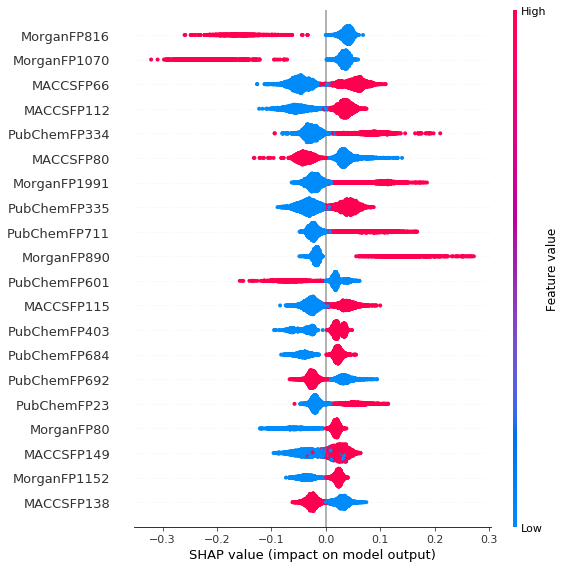

In [13]:
shap.summary_plot(shap_values, X)